<a href="https://colab.research.google.com/github/gaurav1210/NUMERICAL-METHOD-FOR-NEWTON-RAPHSON-METHOD-BY-ITERATIVE-WAY./blob/main/NUMERICAL_METHOD_FOR_NEWTON_RAPHSON_METHOD_BY_ITERATIVE_WAY_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Numerical Methods**

Numerical Roots Finding topics

1. Iterative Methods $\\$
2. Convergent Methods

In [ ]:
'''Import the libraries'''
import numpy as np                                                              # Importing the numpy library for array manipulation
import matplotlib.pyplot as plt                                                 # Importing the matplotlib library for plotting the graph
from typing import Tuple, List                                                  # Importing the typing library for type hinting
import time                                                                     # Importing the time library for measuring the time taken to execute the code


**Question 1: Iterative Methods: Fixed Point, Secant Method, Newton Raphson** $\\$
**Convergent Methods: Bisection, Regula Falsi** $\\$

(a) Fixed Point Iteration method: $x_{k+1} = F (x_k)$

- For the function $f(x) = 1 - (x-1)^2$, will have roots at x = 0 and 2. Plot the function in the range [-3,3].
- Write a fixed point function to compute the roots. Show that x = 0 is a diverging root, while x = 2 is converging.

(b) Bisection Method: Write a function to apply the bisection method, and find the roots in the intervals [-3,0.5] and [0.5,3]

(c) Regula Falsi: Repeat step (b) for Regula Falsi

(d) Secant Method:

(e) Newton Raphson: Divide the interval [-3,3] in the step of 20 and take these as initial conditions to 20 approximation on the roots.
Plot the root approximation vs initial conditions


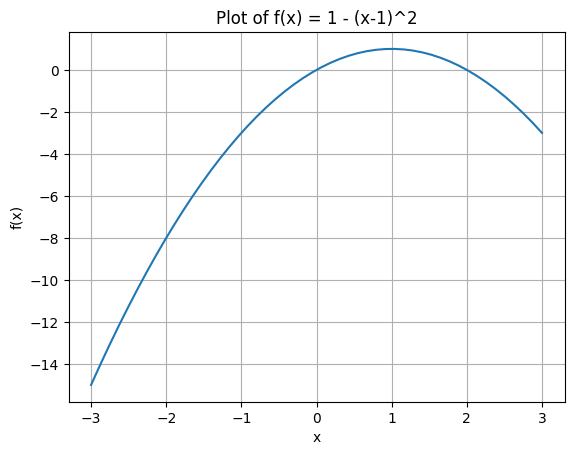

In [ ]:
# Answer 1a: Fixed Point (Iterative)

def f(x):
    return 1 - (x - 1)**2

def fixedp(given_function, x0, min_error=0.001, max_iteration=3) -> Tuple[float, List]:
    """ Fixed point algorithm """
    #start_time = time.time_ns()
    i = 0
    error = 1
    xp = []
    x = None
    while error > min_error and i < max_iteration:
        x = given_function(x0)
        error = abs(x0 - x)
        x0 = x
        xp.append(x0)
        i += 1
    #print((time.time_ns() - start_time)*1.e9, "nano seconds")
    print(xp)
    return x, xp

# Plot the function
x = np.linspace(-3, 3)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x) = 1 - (x-1)^2")
plt.grid(True)
plt.show()


In [ ]:
def g1(x):
    return np.sqrt(1-f(x)) + 1                                                                                         # Rearrange f(x) to isolate x to test diverging root
root_0, iterations_0 = fixedp(g1, 0.1, max_iteration=10)                                                               # Start at 0.1 to avoid sqrt of negative number
print(f"Fixed Point Iteration for x=0 (diverging): Root approximation = {root_0}, Iterations = {iterations_0}")
def g2(x):                                                                                                             # Fixed point iteration for x = 2 (converging root)
  return np.sqrt(1-f(x)) + 1

root_2, iterations_2 = fixedp(g2, 1.9, max_iteration=10)                                                               # Start near the root
print(f"Fixed Point Iteration for x=2 (converging): Root approximation = {root_2}, Iterations = {iterations_2}")

[1.9, 1.9]
Fixed Point Iteration for x=0 (diverging): Root approximation = 1.9, Iterations = [1.9, 1.9]
[1.9]
Fixed Point Iteration for x=2 (converging): Root approximation = 1.9, Iterations = [1.9]


In [ ]:
# Answer 1b: Bisection Method (Covergent)


EPSILON = 0.01

def func(x):
	return 1 - (x - 1)**2

# Prints root of func(x)
# with error of EPSILON
def bisection(a,b):

	if (func(a) * func(b) >= 0):
		print("You have not assumed right a and b\n")
		return

	c = a
	while ((b-a) >= 0.01):

		# Find middle point
		c = (a+b)/2

		# Check if middle point is root
		if (func(c) == 0.0):
			break

		# Decide the side to repeat the steps
		if (func(c)*func(a) < 0):
			b = c
		else:
			a = c

	print("The value of root is : ","%.6f"%c)

bisection(-3, 0.5)
bisection(0.5, 3)


The value of root is :  0.000977
The value of root is :  1.994141


In [ ]:
# Answer 1c: Regular Falsi Method. (Convergent)

MAX_ITER = 1000
# Prints root of func(x) in interval [a, b]
def regulaFalsi( a , b):
    if func(a) * func(b) >= 0:
        print("You have not assumed right a and b")
        return -1

    c = a # Initialize result

    for i in range(MAX_ITER):

        # Find the point that touches x axis
        c = (a * func(b) - b * func(a))/ (func(b) - func(a))

        # Check if the above found point is root
        if func(c) == 0:
            break

        # Decide the side to repeat the steps
        elif func(c) * func(a) < 0:
            b = c
        else:
            a = c
    print("The value of root is : " , '%.4f' %c)

regulaFalsi(-3, 0.5)
regulaFalsi(0.5, 3)


The value of root is :  0.0000
The value of root is :  2.0000


In [ ]:
# Answer 1d: Secant method (Iterative)

def f(x):
    return 1 - (x - 1)**2


def secant(x1, x2, E):
	n = 0; xm = 0; x0 = 0; c = 0;
	if (f(x1) * f(x2) < 0):
		while True:

			# calculate the intermediate value
			x0 = ((x1 * f(x2) - x2 * f(x1)) /
							(f(x2) - f(x1)));

			# check if x0 is root of
			# equation or not
			c = f(x1) * f(x0);

			# update the value of interval
			x1 = x2;
			x2 = x0;

			# update number of iteration
			n += 1;

			# if x0 is the root of equation
			# then break the loop
			if (c == 0):
				break;
			xm = ((x1 * f(x2) - x2 * f(x1)) /
							(f(x2) - f(x1)));

			if(abs(xm - x0) < E):
				break;

		print("Root of the given equation =",
							round(x0, 6));
		print("No. of iterations = ", n);

	else:
		print("Can not find a root in ",
				"the given interval");

secant(-1, 0, 0.0001)
secant(1, 3, 0.0001)



Can not find a root in  the given interval
Root of the given equation = 2.000001
No. of iterations =  6


The value of the root is :  -0.00000000000000114019
The value of the root is :  2.00000000001310729303
The value of the root is :  -0.00000000000001257365
The value of the root is :  -0.00000000000000064709
The value of the root is :  -0.00000000000000001130
The value of the root is :  -0.00000000070371076872
The value of the root is :  -0.00000000004499974806
The value of the root is :  -0.00000000000123444870
The value of the root is :  -0.00000000000000879783
The value of the root is :  -0.00000000338903633869
The value of the root is :  -0.00000000000653641180
The value of the root is :  -0.00000000164334672622
The value of the root is :  0.00000000000000004004
The value of the root is :  -0.00000000000000020249
The value of the root is :  -0.00000000000263214604
The value of the root is :  2.00000000000358424401
The value of the root is :  2.00000000000066346928
The value of the root is :  2.00000000000015409896
The value of the root is :  2.00000000000037347903
The value of the r

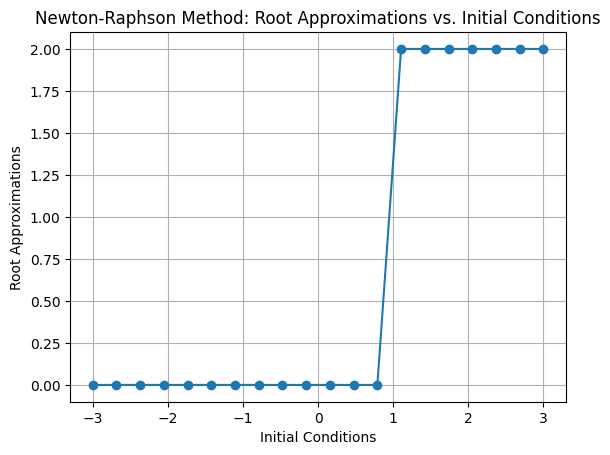

In [ ]:
# Answer 1e: Newton - Raphson (Iterative)

def derivFunc( x ):
    return -2 * (x - 1)
# Function to find the root
def newtonRaphson( x ):
    h = func(x) / derivFunc(x)
    while abs(h) >= 0.0001:
        h = func(x)/derivFunc(x)

        # x(i+1) = x(i) - f(x) / f'(x)
        x = x - h

    print("The value of the root is : ",
                             "%.20f"% x)
    return x

newtonRaphson(0.5)
newtonRaphson(2.5)

initial_conditions = np.linspace(-3, 3, 20)
root_approximations = []

for x0 in initial_conditions:
    root_approximations.append(newtonRaphson(x0))
plt.plot(initial_conditions, root_approximations, marker='o', linestyle='-')
plt.xlabel("Initial Conditions")
plt.ylabel("Root Approximations")
plt.title("Newton-Raphson Method: Root Approximations vs. Initial Conditions")
plt.grid(True)
plt.show()

